<a href="https://colab.research.google.com/github/19PA1A04B1/10-03-2020/blob/master/question_4_uvlinearregression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Import the required packages
import pandas as pd # for handling data in the form of tables
import numpy as np # For handling matrix
from sklearn.model_selection import train_test_split # For spliting the data into train and test
from sklearn.linear_model import LinearRegression # for using the model
from sklearn import metrics
import matplotlib.pyplot as plt # for plotting

In [3]:
a=pd.read_csv("students_placement_data.csv")
a

,Roll No,Gender,Section,SSC Percentage,inter_Diploma_percentage,B.Tech_percentage,Backlogs,registered_for_ Placement_Training,placement status
0,1,M,A,87.3,65.30,40.00,18,NO,Not placed
1,2,F,A,89.0,92.40,71.45,0,yes,Placed
2,3,F,A,67.0,68.00,45.26,13,yes,Not placed
3,4,M,A,71.0,70.40,36.47,17,yes,Not placed
4,5,M,A,67.0,65.50,42.52,17,yes,Not placed
...,...,...,...,...,...,...,...,...,...
112,113,M,B,81.1,78.60,35.84,16,NO,Not placed
113,114,M,B,81.3,85.12,68.50,0,NO,Not placed
114,115,M,B,83.5,89.90,76.30,0,NO,Not placed
115,116,M,B,85.5,90.63,74.50,0,NO,Not placed


In [4]:
x=a["inter_Diploma_percentage"].values.reshape(-1,1)
y=a["B.Tech_percentage"].values.reshape(-1,1)

In [5]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2,random_state=0)


In [6]:
print("X_train- Training data (features) size is ",X_train.shape)
print("X_test- Test data (features) size is ",X_test.shape)
print("Y_train- Training data (labels) size is ",Y_train.shape)
print("Y_test- Test data (labels) size is ",Y_test.shape)

X_train- Training data (features) size is  (93, 1)
X_test- Test data (features) size is  (24, 1)
Y_train- Training data (labels) size is  (93, 1)
Y_test- Test data (labels) size is  (24, 1)


In [7]:
model=LinearRegression()
model.fit(X_train,Y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [8]:
print(model.intercept_)  # This is our 'intercept'

[-2.91074436]


In [9]:
print(model.coef_) # This is our 'slope'

[[0.81041292]]


In [10]:
predicted_btech=model.predict(X_test) # Predict the weights of people in based on their heights
predicted_btech

array([[58.92376179],
       [73.8353596 ],
       [46.60548533],
       [61.84124832],
       [61.35500056],
       [41.01363615],
       [62.73270253],
       [60.78771152],
       [64.35352838],
       [68.89184076],
       [69.70225369],
       [52.19733451],
       [71.80932729],
       [67.75726267],
       [64.62096465],
       [59.08584437],
       [62.73270253],
       [63.29999158],
       [70.99891437],
       [62.0033309 ],
       [65.97435423],
       [54.55563612],
       [68.97288205],
       [72.05245117]])

In [11]:
Actual_predicted=pd.DataFrame({'predicted':predicted_btech.flatten(), 'Actual':Y_test.flatten()})
Actual_predicted

,predicted,Actual
0,58.923762,71.49
1,73.835360,81.10
2,46.605485,62.98
3,61.841248,68.70
4,61.355001,61.02
5,41.013636,60.53
6,62.732703,61.00
7,60.787712,35.84
8,64.353528,68.30
9,68.891841,69.62


Text(0, 0.5, 'B.Tech')

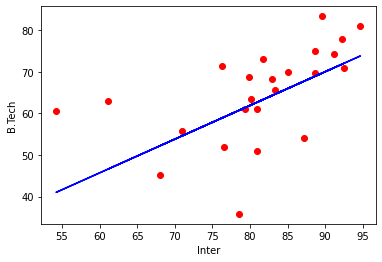

In [12]:
plt.scatter(X_test,Y_test,color='red') # Original values are plotted in red
plt.plot(X_test,predicted_btech, color='blue') # Predicted values are plotted in blue
plt.xlabel("Inter") # Name of X-axis
plt.ylabel("B.Tech") # Name of Y-axis

In [13]:
print('Mean absolute error:',metrics.mean_absolute_error(Y_test, predicted_btech))
print('Mean squared error:',metrics.mean_squared_error(Y_test, predicted_btech))
print("R square",metrics.r2_score(Y_test, predicted_btech))
print('Root Mean squared error:',np.sqrt(metrics.mean_squared_error(Y_test, predicted_btech)))

Mean absolute error: 7.553687276785884
Mean squared error: 98.30444865156251
R square 0.2213404843077168
Root Mean squared error: 9.914859991525978
